In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("customersdata.xlsx")

In [3]:
df.columns

Index(['fraudulent', 'customer__customerEmail', 'customer__customerPhone',
       'customer__customerDevice', 'customer__customerIPAddress',
       'customer__customerBillingAddress', 'orders__orderId',
       'orders__orderAmount', 'orders__orderState',
       'orders__orderShippingAddress', 'paymentMethods__paymentMethodId',
       'paymentMethods__paymentMethodRegistrationFailure',
       'paymentMethods__paymentMethodType',
       'paymentMethods__paymentMethodProvider',
       'paymentMethods__paymentMethodIssuer', 'transactions__transactionId',
       'transactions__orderId', 'transactions__paymentMethodId',
       'transactions__transactionAmount', 'transactions__transactionFailed'],
      dtype='object')

In [5]:
df1=df.drop(['customer__customerEmail','orders__orderAmount','customer__customerBillingAddress','customer__customerIPAddress','orders__orderShippingAddress','customer__customerPhone','customer__customerDevice','orders__orderId','paymentMethods__paymentMethodId','paymentMethods__paymentMethodProvider','paymentMethods__paymentMethodIssuer','transactions__transactionId','transactions__orderId','transactions__paymentMethodId'],axis=1)

In [6]:
df1.head()

,fraudulent,orders__orderState,paymentMethods__paymentMethodRegistrationFailure,paymentMethods__paymentMethodType,transactions__transactionAmount,transactions__transactionFailed
0,0.0,pending,1.0,card,18.0,0.0
1,NaN,fulfilled,NaN,NaN,26.0,0.0
2,1.0,fulfilled,1.0,bitcoin,45.0,0.0
3,NaN,fulfilled,0.0,card,23.0,0.0
4,NaN,fulfilled,0.0,card,43.0,1.0


In [7]:
df1.shape

(706, 6)

In [19]:
df1['orders__orderState'].value_counts()

fulfilled    400
failed        50
pending       28
Name: orders__orderState, dtype: int64

In [20]:
df1['paymentMethods__paymentMethodType'].value_counts()

card         242
paypal        36
apple pay     36
bitcoin       28
Name: paymentMethods__paymentMethodType, dtype: int64

In [8]:
df1.isna().sum()

fraudulent                                          538
orders__orderState                                  228
paymentMethods__paymentMethodRegistrationFailure    364
paymentMethods__paymentMethodType                   364
transactions__transactionAmount                      83
transactions__transactionFailed                      83
dtype: int64

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025400593CF8>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025400608630>]],
       dtype=object))

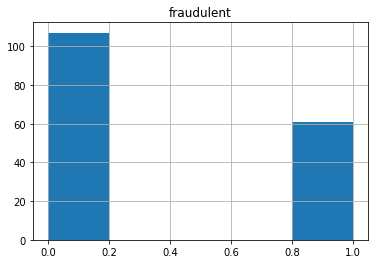

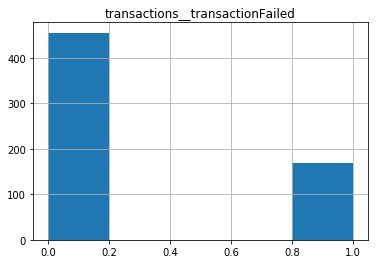

In [9]:
df1.hist('fraudulent',bins=5),df1.hist('transactions__transactionFailed',bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025400642E10>]],
      dtype=object)

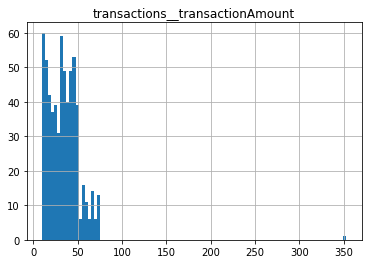

In [10]:
df1.hist('transactions__transactionAmount',bins=100)

In [11]:
df1.describe()

,fraudulent,paymentMethods__paymentMethodRegistrationFailure,transactions__transactionAmount,transactions__transactionFailed
count,168.000000,342.000000,623.000000,623.000000
mean,0.363095,0.116959,34.598716,0.269663
std,0.482330,0.321842,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,0.000000,0.000000,21.000000,0.000000
50%,0.000000,0.000000,34.000000,0.000000
75%,1.000000,0.000000,45.000000,1.000000
max,1.000000,1.000000,353.000000,1.000000


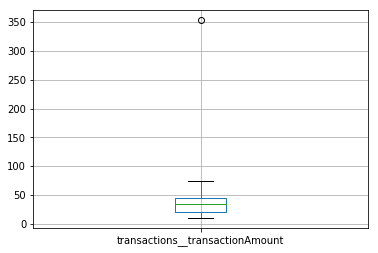

In [12]:
df1.boxplot(column='transactions__transactionAmount')

In [13]:
df1.corr(method='pearson')

,fraudulent,paymentMethods__paymentMethodRegistrationFailure,transactions__transactionAmount,transactions__transactionFailed
fraudulent,1.000000,-0.080178,0.275806,0.040578
paymentMethods__paymentMethodRegistrationFailure,-0.080178,1.000000,-0.019467,0.007904
transactions__transactionAmount,0.275806,-0.019467,1.000000,0.002385
transactions__transactionFailed,0.040578,0.007904,0.002385,1.000000


In [30]:
pd.crosstab([df1.paymentMethods__paymentMethodType,df1.orders__orderState],[df1.fraudulent],margins=True)

fraudulent                                            0.0  1.0  All
paymentMethods__paymentMethodType orders__orderState               
apple pay                         failed                2    0    2
                                  fulfilled             4    7   11
bitcoin                           failed                1    2    3
                                  fulfilled             6    5   11
card                              failed                6    5   11
                                  fulfilled            50   30   80
                                  pending               5    1    6
paypal                            failed                2    0    2
                                  fulfilled            10    3   13
                                  pending               1    1    2
All                                                    87   54  141

In [15]:
df1['transactions__transactionAmount'].fillna(df['transactions__transactionAmount'].mean(), inplace=True)
df1.head()

,fraudulent,orders__orderState,paymentMethods__paymentMethodRegistrationFailure,paymentMethods__paymentMethodType,transactions__transactionAmount,transactions__transactionFailed
0,0.0,pending,1.0,card,18.0,0.0
1,NaN,fulfilled,NaN,NaN,26.0,0.0
2,1.0,fulfilled,1.0,bitcoin,45.0,0.0
3,NaN,fulfilled,0.0,card,23.0,0.0
4,NaN,fulfilled,0.0,card,43.0,1.0


In [16]:
df1.isna().sum()

fraudulent                                          538
orders__orderState                                  228
paymentMethods__paymentMethodRegistrationFailure    364
paymentMethods__paymentMethodType                   364
transactions__transactionAmount                       0
transactions__transactionFailed                      83
dtype: int64

# Report


Objective: To Investigate Frauds in e-commerce data set using Exploratory Data Analysis
Tools/Methods used:
Summary Measures        :  Tables,Graphs,Central Tendencies
Relationship Analysis      :   Cross tabs, Correlations
Software’s Used              :    Python(jupyter notebook), Excel

FINDINGS:
	   total	fraud	percentage of Fraud
card	106	39	36.79245	
apple pay	14	7	50	
bitcoin	14	7	50	
paypal	22	7	31.81818	

•	It is found that people who are using Apple pay and bitcoins are found as fraudulent As per the data Recorded.
•	Among the fulfilled Transaction People who are using card are Found to be fraudulent it may be because of carding techniques.
•	In Data set missing values are above 50% 
•	Transaction amount variable is not much effected by outliers , there is only one outlier existed in Transaction amount variable, so we can use mean for missing  values replacement
•	It is found that 75% of people are spending amount between 10-50 and it is shown in Histogram and box plot
SUGGESTIONS:
•	It is suggested that to collect the data regarding Ip address because it is essential to estimate the fraudulent .
•	It is not suggested to impute all missing values with mode because here maximum data is missing and the data is categorical.
CONCLUSION:
•	We have to impute missing values with various methods like knn imputation and mode for to increase the Accuracy
•	Here we can use Logistic Regression for probability of fraudulent. And we can also use Random Forest classifier for Constraints designing.






























